In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#replacing the zero values with the mean values

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['BMI'].mean())

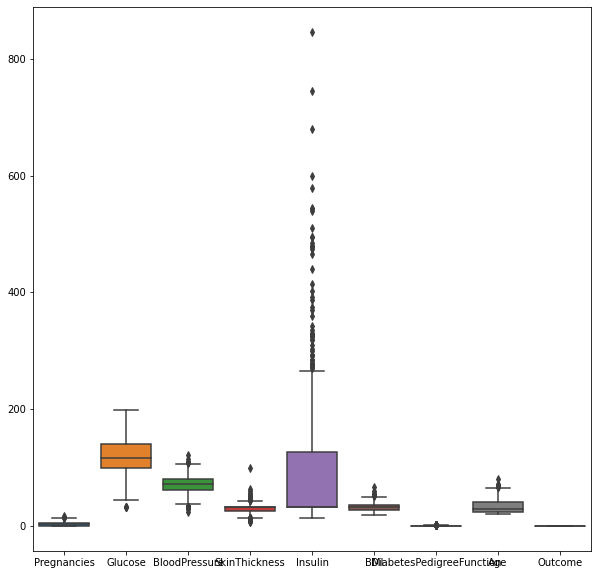

In [ ]:
#boxplot visualization for outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df, ax = ax)

There are multiple outliers in the 'Insulin' column of the dataset. These need to be handled

For handling outliers, we can select a specific quantile range and then, we can later discard the rest as outliers which fall above this range



In [ ]:
#let us choose 70% as our quantile range and any datapoints above this range would be considered outliers

q= df['Insulin'].quantile(0.70)
q

106.0

In [ ]:
df_new = df[df['Insulin'] < q]

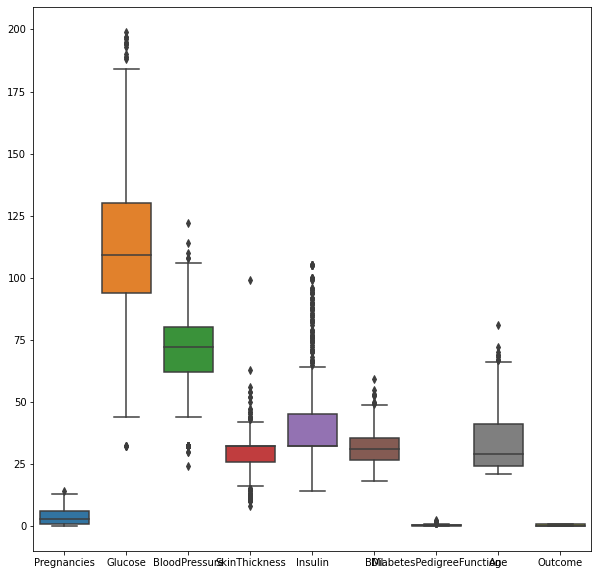

In [ ]:
#verifying with the boxplot

fig , ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df_new, ax = ax)

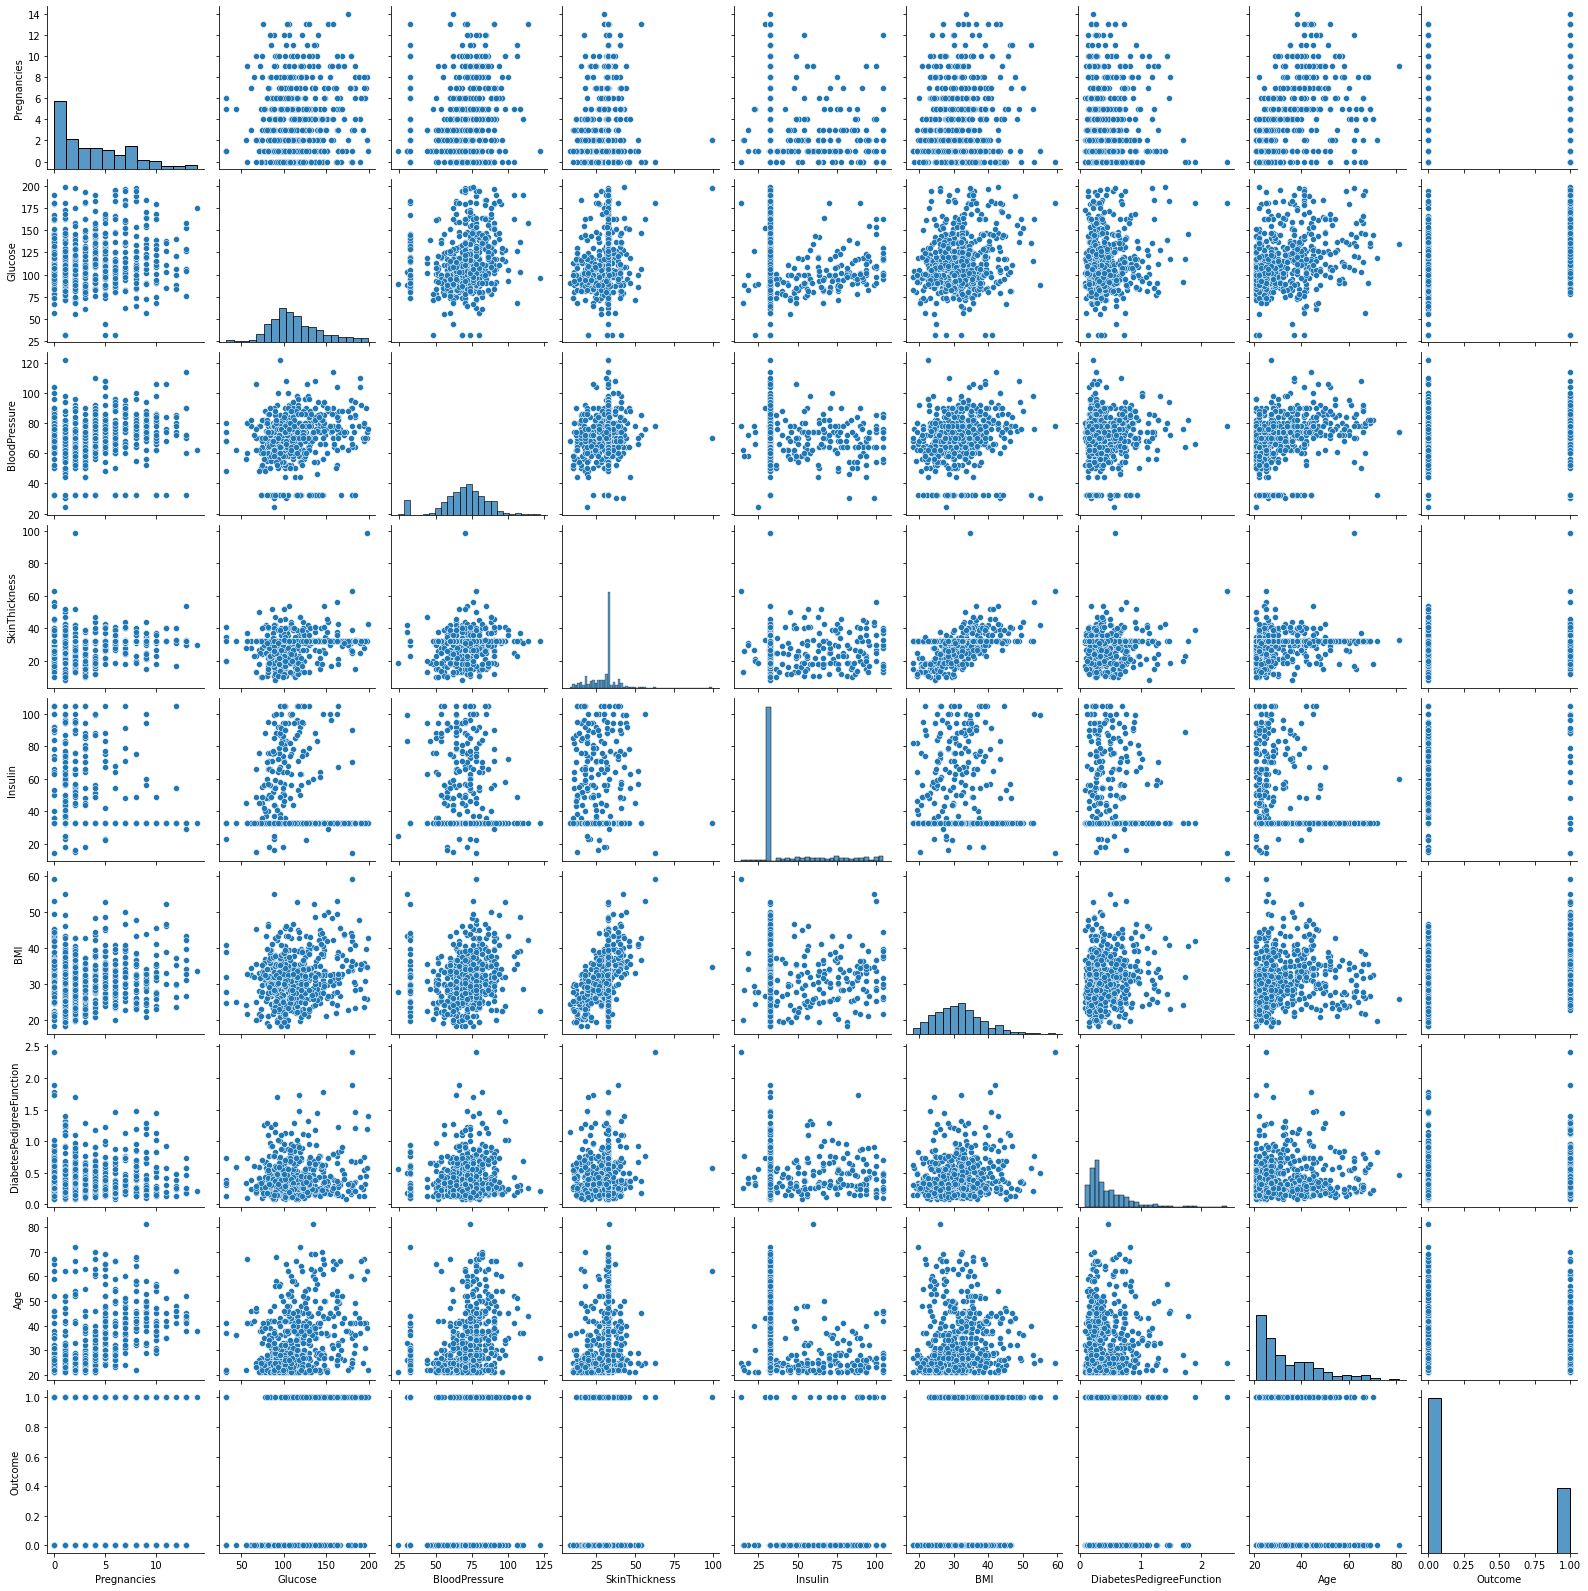

In [ ]:

sns.pairplot(df_new)


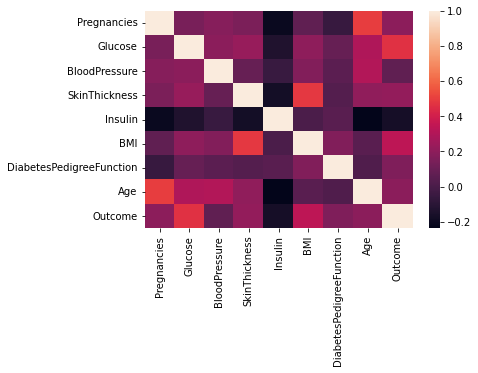

In [ ]:
sns.heatmap(df_new.corr())

In [ ]:
#splitting dataset into features and label

x = df_new.drop(columns=['Outcome'])  #features
y = df_new['Outcome'] #lables

In [ ]:
df_new=(df_new-df_new.min())/(df_new.max()-df_new.min())

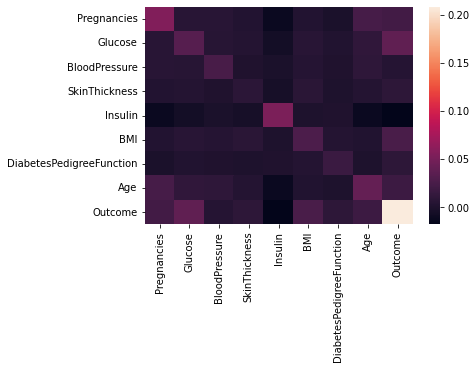

In [ ]:
sns.heatmap(df_new.cov())

In [ ]:
df_new.shape

(536, 9)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,  max_iter=100)
clf = clf.fit(X_train_r, y_train)
pred = clf.predict(X_test_r)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Accuracy: %s' % metrics.accuracy_score(y_test, pred))

Mean Absolute Error: 0.23148148148148148
Accuracy: 0.7685185185185185


**Conclusion:**
Successfully, predicted whether a patient has diabetes based on diagnostic measurements, with a Mean Absolute Error: 0.23148148148148148
 and Accuracy: 0.7685185185185185
.


